In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "data/mnist/"
train_data = pd.read_csv(data_path + 'train.csv')
test_data = pd.read_csv(data_path + 'test.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X, y = train_data.drop('label', axis=1).to_numpy(), train_data['label'].to_numpy()

In [112]:
def plot_digit(x_set, y_set, idx):
    img = x_set[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y_set.T[idx])
    plt.show()

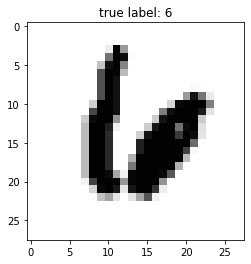

In [113]:
plot_digit(X, y, idx = 41575)

[[   0 4132]
 [   1 4684]
 [   2 4177]
 [   3 4351]
 [   4 4072]
 [   5 3795]
 [   6 4137]
 [   7 4401]
 [   8 4063]
 [   9 4188]]


(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

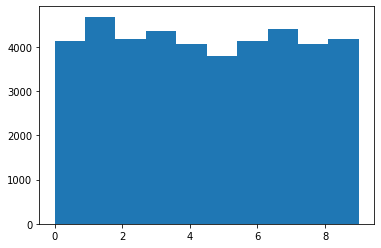

In [114]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)
plt.hist(y)

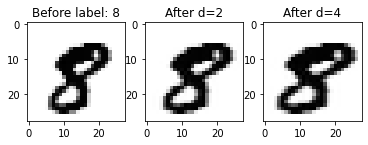

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([8., 8.]))

In [61]:
# Image augmentation
from PIL import Image

def transform_image(x_set, y_set, idx, show=False):
    #print(x_set[idx].shape)
    img = x_set[idx].reshape(28,28)
    im = Image.fromarray(np.uint8(img))
    ds = [2, 4]
    ims = []
    for d in ds:
        im = Image.fromarray(np.uint8(img))
        im = im.resize((28 + 2 * d, 28), Image.ANTIALIAS)
        im = im.crop((d, 0, 28 + d, 28))
        im = np.asarray(im)
        ims.append(im)
    if(show):
        fig, ax = plt.subplots(1, len(ds) + 1)
        ax[0].imshow(img, cmap='Greys',  interpolation='nearest')
        ax[0].set_title('Before label: %d' % y_set.T[idx])
        for i in range(len(ims)):
            ax[i + 1].imshow(ims[i], cmap='Greys',  interpolation='nearest')
            ax[i + 1].set_title('After d=%d' % ds[i])
        plt.show()
    ims = np.array([im.flatten() for im in ims])
    #print(ims.shape)
    return ims, y_set.T[idx] * np.ones(len(ims))

transform_image(X, y, idx = 10, show=True)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
[[0.0000e+00 1.2396e+04]
 [1.0000e+00 1.4052e+04]
 [2.0000e+00 1.2531e+04]
 [3.0000e+00 1.3053e+04]
 [4.0000e+00 1.2216e+04]
 [5.0000e+00 1.1385e+04]
 [6.0000e+00 1.2411e+04]
 [7.0000e+00 1.3203e+04]
 [8.0000e+00 1.2189e+04]
 [9.0000e+00 1.2564e+04]]


(array([12396., 14052., 12531., 13053., 12216., 11385., 12411., 13203.,
        12189., 12564.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

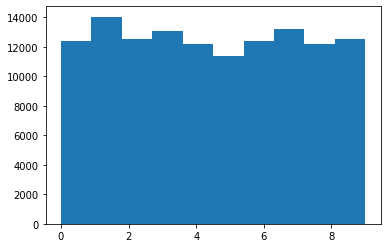

In [16]:
def transform_dataset(X, Y):
    X_res, y_res = X, Y
    for idx in range(len(X)):
        if(idx % 1000 == 0):
            print(idx)
        x0, y0 = transform_image(X, y, idx = idx)
        X_res = np.append(X_res, x0, axis=0)
        y_res = np.append(y_res, y0, axis=0)
    return X_res, y_res
X2, y2 = transform_dataset(X, y)
unique, counts = np.unique(y2, return_counts=True)
print(np.asarray((unique, counts)).T)
plt.hist(y2)

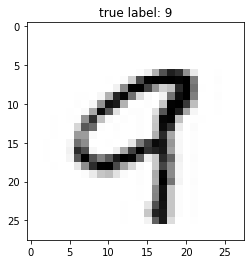

(126000, 784) (126000,)


In [17]:
# Check result
plot_digit(X2, y2, idx = -1)
print(X2.shape, y2.shape)

In [115]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y.reshape(-1, 1)).toarray()

In [116]:
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
X = X.astype('float32') / 255.0
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [106]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)

In [107]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#from keras.utils import to_categorical, plot_model

# ANN

In [40]:
# network parameters
batch_size = 128
hidden_units = 256
input_size = X_train.shape[1]
num_labels = 10
def define_model():
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = define_model()

In [41]:
model.fit(X_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20


ValueError: in user code:

    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [14]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

83/83 [==============================] - 0s 2ms/step - loss: 0.1325 - accuracy: 0.9769

Test accuracy: 97.7%


# ANN

In [123]:
X_train, y_train = X, y

In [147]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45
input_size = X_train.shape[1]
num_labels = 10

In [148]:
# model is a 3-layer MLP with ReLU and dropout after each layer
def define_model():
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = define_model()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 256)               200960    
_________________________________________________________________
activation_107 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 256)               65792     
_________________________________________________________________
activation_108 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_109 (Dense)            (None, 10)              

In [138]:
history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
266/266 [==============================] - 3s 10ms/step - loss: 0.4064 - accuracy: 0.8728 - val_loss: 0.1783 - val_accuracy: 0.9468
Epoch 2/20
266/266 [==============================] - 2s 9ms/step - loss: 0.1761 - accuracy: 0.9455 - val_loss: 0.1490 - val_accuracy: 0.9574
Epoch 3/20
266/266 [==============================] - 3s 10ms/step - loss: 0.1315 - accuracy: 0.9589 - val_loss: 0.1221 - val_accuracy: 0.9667
Epoch 4/20
266/266 [==============================] - 3s 10ms/step - loss: 0.1051 - accuracy: 0.9664 - val_loss: 0.1104 - val_accuracy: 0.9701
Epoch 5/20
266/266 [==============================] - 3s 10ms/step - loss: 0.0952 - accuracy: 0.9698 - val_loss: 0.1077 - val_accuracy: 0.9698
Epoch 6/20
266/266 [==============================] - 3s 10ms/step - loss: 0.0819 - accuracy: 0.9733 - val_loss: 0.1055 - val_accuracy: 0.9709
Epoch 7/20
266/266 [==============================] - 3s 10ms/step - loss: 0.0730 - accuracy: 0.9767 - val_loss: 0.1106 - val_accuracy: 0.9720


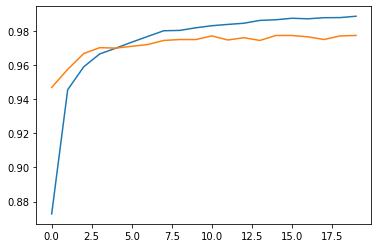

In [140]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [149]:
models = []
n = 15
for i in range(n):
    model = define_model()
    model.fit(X_train, y_train, epochs=20, batch_size=batch_size)
    models.append(model)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 256)               200960    
_________________________________________________________________
activation_110 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 256)               65792     
_________________________________________________________________
activation_111 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 10)              

Epoch 1/20
296/296 [==============================] - 2s 4ms/step - loss: 0.5195 - accuracy: 0.8382
Epoch 2/20
296/296 [==============================] - 1s 5ms/step - loss: 0.2238 - accuracy: 0.9324
Epoch 3/20
296/296 [==============================] - 1s 5ms/step - loss: 0.1739 - accuracy: 0.9479
Epoch 4/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1478 - accuracy: 0.9552
Epoch 5/20
296/296 [==============================] - 1s 5ms/step - loss: 0.1294 - accuracy: 0.9604
Epoch 6/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1172 - accuracy: 0.9644
Epoch 7/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0994 - accuracy: 0.9690
Epoch 8/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0960 - accuracy: 0.9692
Epoch 9/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0906 - accuracy: 0.9710
Epoch 10/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0822 - accuracy: 0.9740

296/296 [==============================] - 1s 4ms/step - loss: 0.0656 - accuracy: 0.9787
Epoch 15/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0631 - accuracy: 0.9797
Epoch 16/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0596 - accuracy: 0.9806
Epoch 17/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0570 - accuracy: 0.9812
Epoch 18/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0565 - accuracy: 0.9809
Epoch 19/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9809
Epoch 20/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9835
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_125 (Dense)            (None, 256)               200960    
_________________________________________________________________
activation_125 (Ac

Epoch 1/20
296/296 [==============================] - 2s 4ms/step - loss: 0.5181 - accuracy: 0.8381
Epoch 2/20
296/296 [==============================] - 1s 4ms/step - loss: 0.2263 - accuracy: 0.9314
Epoch 3/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1747 - accuracy: 0.9467
Epoch 4/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1449 - accuracy: 0.9563
Epoch 5/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1250 - accuracy: 0.9624
Epoch 6/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1128 - accuracy: 0.9656
Epoch 7/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1008 - accuracy: 0.9692
Epoch 8/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0954 - accuracy: 0.9690
Epoch 9/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0886 - accuracy: 0.9719
Epoch 10/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0830 - accuracy: 0.9740

296/296 [==============================] - 1s 4ms/step - loss: 0.0686 - accuracy: 0.9780
Epoch 14/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0617 - accuracy: 0.9801
Epoch 15/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0666 - accuracy: 0.9796
Epoch 16/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9806
Epoch 17/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0608 - accuracy: 0.9801
Epoch 18/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0535 - accuracy: 0.9824
Epoch 19/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0543 - accuracy: 0.9822
Epoch 20/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0518 - accuracy: 0.9828
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 256)         

Epoch 1/20
296/296 [==============================] - 2s 4ms/step - loss: 0.5276 - accuracy: 0.8346
Epoch 2/20
296/296 [==============================] - 1s 4ms/step - loss: 0.2317 - accuracy: 0.9304
Epoch 3/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1739 - accuracy: 0.9471
Epoch 4/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1465 - accuracy: 0.9558
Epoch 5/20
296/296 [==============================] - 1s 4ms/step - loss: 0.1270 - accuracy: 0.9615
Epoch 6/20
296/296 [==============================] - 1s 5ms/step - loss: 0.1099 - accuracy: 0.9659
Epoch 7/20
296/296 [==============================] - 1s 5ms/step - loss: 0.1004 - accuracy: 0.9679
Epoch 8/20
296/296 [==============================] - 1s 5ms/step - loss: 0.0945 - accuracy: 0.9704
Epoch 9/20
296/296 [==============================] - 1s 5ms/step - loss: 0.0891 - accuracy: 0.9726
Epoch 10/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0804 - accuracy: 0.9748

296/296 [==============================] - 1s 5ms/step - loss: 0.0671 - accuracy: 0.9789
Epoch 15/20
296/296 [==============================] - 1s 5ms/step - loss: 0.0600 - accuracy: 0.9803
Epoch 16/20
296/296 [==============================] - 1s 5ms/step - loss: 0.0622 - accuracy: 0.9803
Epoch 17/20
296/296 [==============================] - 1s 5ms/step - loss: 0.0554 - accuracy: 0.9825
Epoch 18/20
296/296 [==============================] - 1s 5ms/step - loss: 0.0569 - accuracy: 0.9818
Epoch 19/20
296/296 [==============================] - 2s 5ms/step - loss: 0.0538 - accuracy: 0.9824
Epoch 20/20
296/296 [==============================] - 1s 4ms/step - loss: 0.0543 - accuracy: 0.9822


<AxesSubplot:>

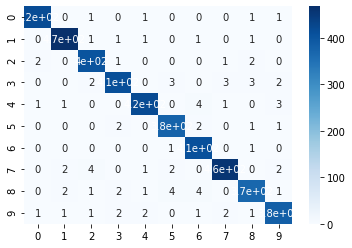

In [151]:
n = 15
y_pred = np.zeros((y_test.shape[0], 10))
for i in range(n):
    y_pred = y_pred + models[i].predict(X_test)
y_pred = y_pred / n

y_true = y_test
y_true = np.argmax(y_true, axis=1).T
y_pred = np.argmax(y_pred, axis=1).T
import seaborn as sns
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

In [152]:
np.mean(y_pred == y_true)

0.9802380952380952

In [134]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

66/66 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9750

Test accuracy: 97.5%


In [50]:
X_test.shape

(12600, 784)

# CNN

In [134]:
from keras.datasets import mnist
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization

In [135]:
X_train2 = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test2 = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [100]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = define_model()
model.fit(X_train2, y_train, epochs=20, batch_size=batch_size)

c:\users\kam\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
329/329 [==============================] - 7s 21ms/step - loss: 0.3240 - accuracy: 0.9022
Epoch 2/20
329/329 [==============================] - 8s 24ms/step - loss: 0.1319 - accuracy: 0.9610
Epoch 3/20
329/329 [==============================] - 8s 23ms/step - loss: 0.0891 - accuracy: 0.9745
Epoch 4/20
329/329 [==============================] - 8s 24ms/step - loss: 0.0684 - accuracy: 0.9803
Epoch 5/20
329/329 [==============================] - 8s 24ms/step - loss: 0.0561 - accuracy: 0.9837
Epoch 6/20
329/329 [==============================] - 8s 24ms/step - loss: 0.0457 - accuracy: 0.9867
Epoch 7/20
329/329 [==============================] - 8s 24ms/step - loss: 0.0398 - accuracy: 0.9887 0s
Epoch 8/20
329/329 [==============================] - 8s 25ms/step - loss: 0.0330 - accuracy: 0.9907
Epoch 9/20
329/329 [==============================] - 8s 26ms/step - loss: 0.0286 - accuracy: 0.9922
Epoch 10/20
329/329 [==============================] - ETA: 0s - loss: 0.0264 - accuracy

In [101]:
loss, acc = model.evaluate(X_test2, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

83/83 [==============================] - 1s 8ms/step - loss: 0.0050 - accuracy: 0.9996

Test accuracy: 100.0%


In [137]:
loss, acc = model.evaluate(X_test2, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

83/83 [==============================] - 2s 18ms/step - loss: 0.0014 - accuracy: 0.9998

Test accuracy: 100.0%


# PCA + ANN

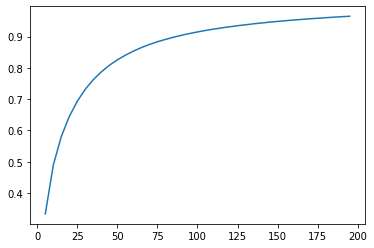

In [155]:
from sklearn.decomposition import PCA
n_components = np.arange(5, 200, 5)
explanations = []
for n in n_components:
    pca = PCA(n_components = n)
    pca.fit(X_train)
    X_train3 = pca.transform(X_train)
    explanations.append(sum(pca.explained_variance_ratio_))
plt.plot(n_components, explanations)

In [157]:
n_features = 125
pca = PCA(n_components = n_features)
pca.fit(X_train)
X_train3 = pca.transform(X_train)
sum(pca.explained_variance_ratio_)

0.9344250716385432

In [166]:
X_test3 = pca.transform(X_test)

In [160]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45
input_size = X_train3.shape[1]
num_labels = 10
def define_model():
    # model is a 3-layer MLP with ReLU and dropout after each layer
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = define_model()
model.fit(X_train3, y_train, epochs=20, batch_size=batch_size)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               32256     
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

In [168]:
loss, acc = model.evaluate(X_test3, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

83/83 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9964

Test accuracy: 99.6%


# Save results

In [153]:
X_res = test_data.to_numpy()
X_res2 = X_res.reshape((X_res.shape[0], 28, 28, 1))
#X_res3 = pca.transform(X_res)

In [144]:
pred = model.predict(X_res)

In [145]:
y_pred = np.argmax(pred, axis=1).T

In [155]:
arr = y_pred
np.savetxt("mnist.csv", np.dstack((np.arange(1, arr.size+1),arr))[0],"%d,%d",header="ImageId,Label")

# Cross validation

In [82]:
def define_model():
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam',
                  metrics=['accuracy'])
    return model
model = define_model()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_48 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_49 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 256)             

In [83]:
from sklearn.model_selection import KFold
num_folds = 10
batch_size = 128
no_epochs = 40
acc_per_fold = []
loss_per_fold = []
models = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1



for train, test in kfold.split(X, y):
    model = define_model()
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(X[train], y[train],
              batch_size=batch_size,
              epochs=no_epochs)
    models.append(model)

    # Generate generalization metrics
    scores = model.evaluate(X[test], y[test])
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_52 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_53 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 256)             

296/296 [==============================] - 1s 5ms/step - loss: 0.0647 - accuracy: 0.9802
Epoch 23/40
296/296 [==============================] - 1s 5ms/step - loss: 0.0596 - accuracy: 0.9813
Epoch 24/40
296/296 [==============================] - 1s 5ms/step - loss: 0.0597 - accuracy: 0.9810
Epoch 25/40
296/296 [==============================] - 1s 5ms/step - loss: 0.0566 - accuracy: 0.9824
Epoch 26/40
296/296 [==============================] - 1s 5ms/step - loss: 0.0519 - accuracy: 0.9837
Epoch 27/40
296/296 [==============================] - 1s 4ms/step - loss: 0.0554 - accuracy: 0.9827
Epoch 28/40
296/296 [==============================] - 1s 5ms/step - loss: 0.0517 - accuracy: 0.9842
Epoch 29/40
296/296 [==============================] - 1s 4ms/step - loss: 0.0527 - accuracy: 0.9834
Epoch 30/40
296/296 [==============================] - 1s 5ms/step - loss: 0.0507 - accuracy: 0.9845
Epoch 31/40
296/296 [==============================] - 1s 5ms/step - loss: 0.0535 - accuracy: 0.9841
Ep

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/40
296/296 [==============================] - 2s 4ms/step - loss: 0.6261 - accuracy: 0.7982
Epoch 2/40
296/296 [==============================] - 1s 4ms/step - loss: 0.2580 - accuracy: 0.9242
Epoch 3/40
296/296 [==============================] - 1s 4ms/step - loss: 0.2029 - accuracy: 0.9415
Epoch 4/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1711 - accuracy: 0.9497
Epoch 5/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1483 - accuracy: 0.9569
Epoch 6/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1326 - accuracy: 0.9612
Epoch 7/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1229 - accuracy: 0.9632
Epoch 8/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1132 - accuracy: 0.9668
Epoch 9/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1091 - accuracy: 0.9674
Epo

132/132 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9798
Score for fold 7: loss of 0.07596695423126221; accuracy of 97.97618985176086%
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_80 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_81 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_53 (Dropou

Epoch 1/40
296/296 [==============================] - 2s 4ms/step - loss: 0.6358 - accuracy: 0.7937
Epoch 2/40
296/296 [==============================] - 1s 4ms/step - loss: 0.2603 - accuracy: 0.9232
Epoch 3/40
296/296 [==============================] - 1s 4ms/step - loss: 0.2038 - accuracy: 0.9397
Epoch 4/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1742 - accuracy: 0.9496
Epoch 5/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1557 - accuracy: 0.9535
Epoch 6/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1308 - accuracy: 0.9616
Epoch 7/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1235 - accuracy: 0.9639
Epoch 8/40
296/296 [==============================] - 2s 5ms/step - loss: 0.1123 - accuracy: 0.9663
Epoch 9/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1089 - accuracy: 0.9669
Epoch 10/40
296/296 [==============================] - 1s 4ms/step - loss: 0.1021 - accuracy: 0.9696

In [84]:
np.mean(acc_per_fold)

97.9285717010498

In [85]:
np.argmax(acc_per_fold)

2

In [87]:
acc_per_fold[2]
model = models[2]

In [141]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = model.predict(X_test)
y_true = np.argmax(y_true, axis=1).T
y_pred = np.argmax(y_pred, axis=1).T

<AxesSubplot:>

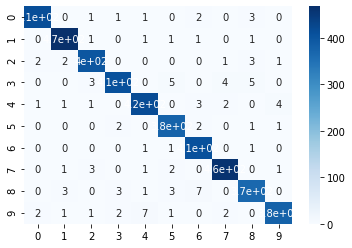

In [142]:
import seaborn as sns
cf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues')